<pre>
<font color='red'>
                                             Titanic Competition
</font>
</pre>

<pre>   
                                                                         <span style='color:blue'> Author: </span> NACHOUR Ilham 
</pre>

## Importing the Libraries

In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics

## Loading test and training data

In [2]:
#read train data
train_data=pd.read_csv('train.csv')
#read test data
test_data=pd.read_csv('test.csv')

## First look to our data

In [3]:
print('----------------------------------------------------train data --------------------------------------------------------------')
display(train_data.head())
print('----------------------------------------------------test data ---------------------------------------------------------------')
display(test_data.head())

----------------------------------------------------train data --------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----------------------------------------------------test data ---------------------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

In [4]:
#check out the size of the data
print('Train data shape:',train_data.shape)
print('Test data shape:',test_data.shape)

Train data shape: (891, 12)
Test data shape: (418, 11)


The training-set has 891 examples and 12 features,while test-set has 418 examples and only 11 features,this is due to,the fact that the test data doesn't include the target column Survived.

In [5]:
#check if there are duplicated values in data train and data test
print('Number of duplicate rows in train data :',train_data.duplicated().sum())
print('Number of duplicate rows in test data:',test_data.duplicated().sum())

Number of duplicate rows in train data : 0
Number of duplicate rows in test data: 0


It seems like duplicate rows don't exist in test and training data.

In [6]:
print('-------------------------------information about our training data-------------------------------------------------')
print(train_data.info())
print()
print('--------------------------------information about our test data------------------------------------------------------')
print(test_data.info())

-------------------------------information about our training data-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--------------------------------information about our test data------------------------------------------------------
<cla

From the result above, we notice that there are two types of data: numerical and categorical data.
Fisrt let's have a short description of our training data:

In [7]:
#training data
print('numerical feature descriptive statistics')
train_data.describe().T

numerical feature descriptive statistics


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
print('categorical feature descriptive statistics')
train_data.describe(include='object').T.sort_values(by=['unique'], ascending=False)

categorical feature descriptive statistics


,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644
Sex,891,2,male,577


Above we can see that 38.3% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.42 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ and 'Cabin' features.So let's move on test data:

In [9]:
#test data
print('numerical feature descriptive statistics')
test_data.describe().T

numerical feature descriptive statistics


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [10]:
print('categorical feature descriptive statistics')
train_data.describe(include='object').T.sort_values(by=['unique'], ascending=False)

categorical feature descriptive statistics


,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644
Sex,891,2,male,577


From the two tables above, we can see some columns, that contain missing values, for example the ‘Age’ and 'Cabin' features.

From all, we conclude that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.Based on the following results,Let’s take a more detailed look at what data is actually missing:

Text(0.5, 25.722222222222214, 'test data')

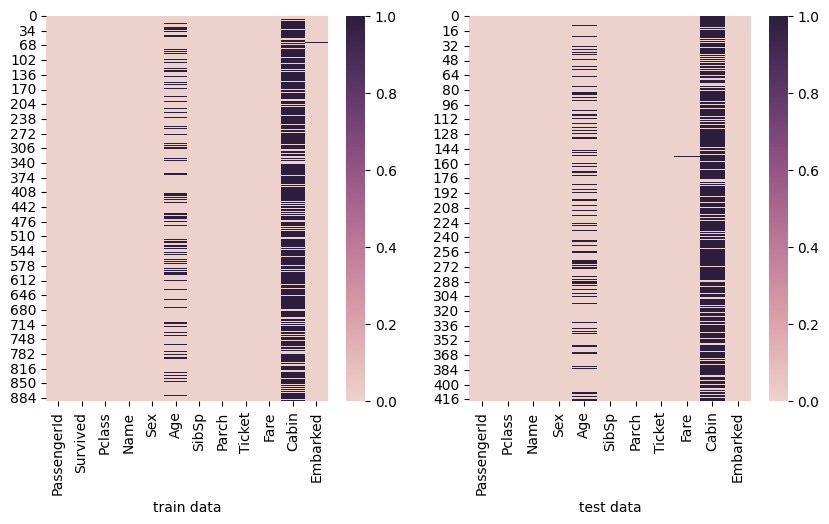

In [11]:
#First look
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(train_data.isnull(),ax=ax[0],cmap=sns.cubehelix_palette(as_cmap=True))
ax[0].set_xlabel('train data')
sns.heatmap(test_data.isnull(), ax=ax[1],cmap=sns.cubehelix_palette(as_cmap=True))
ax[1].set_xlabel('test data')

In [12]:
#check missing values
#for train
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent_2], axis=1, keys=['null train values', '%'])
missing_data_train.style.background_gradient('viridis')

,null train values,%
Cabin,687,77.100000
Age,177,19.900000
Embarked,2,0.200000
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature looks like that we might want to drop it from the dataset, since 77.1 % rows of it are missing.

In [13]:
#check missing values
#for test
total = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = test_data.isnull().sum()/test_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent_2], axis=1, keys=['null test values', '%'])
missing_data_test.style.background_gradient('viridis')

,null test values,%
Cabin,327,78.200000
Age,86,20.600000
Fare,1,0.200000
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


The Fare feature will be easy to deal with since it has only 1 missing values,but Cabin and Age features are much more complicated because they have respectively 327 and 86 missing values.it's seems that we gonna drop the Cabin feature since 78.2% values are missings.

## Data visualization

Now let's make some plots to visualize our features:

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

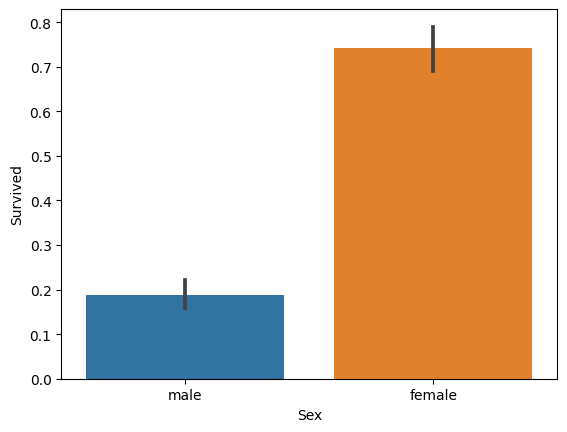

In [14]:
#Sex
sns.barplot(x='Sex', y='Survived', data=train_data)

We can see cleary that female have a high probability of survival then male

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

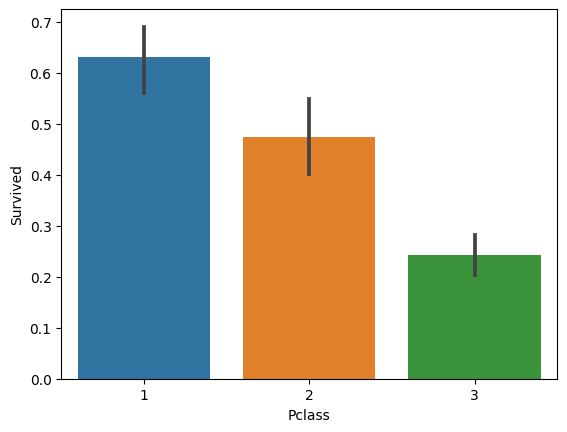

In [15]:
#Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)

From the graph above,we see clearly, if a person is in class 1 ,he has a higher chance of survival.
To confirm our assumption about pclass 1, we will create another pclass plot below:


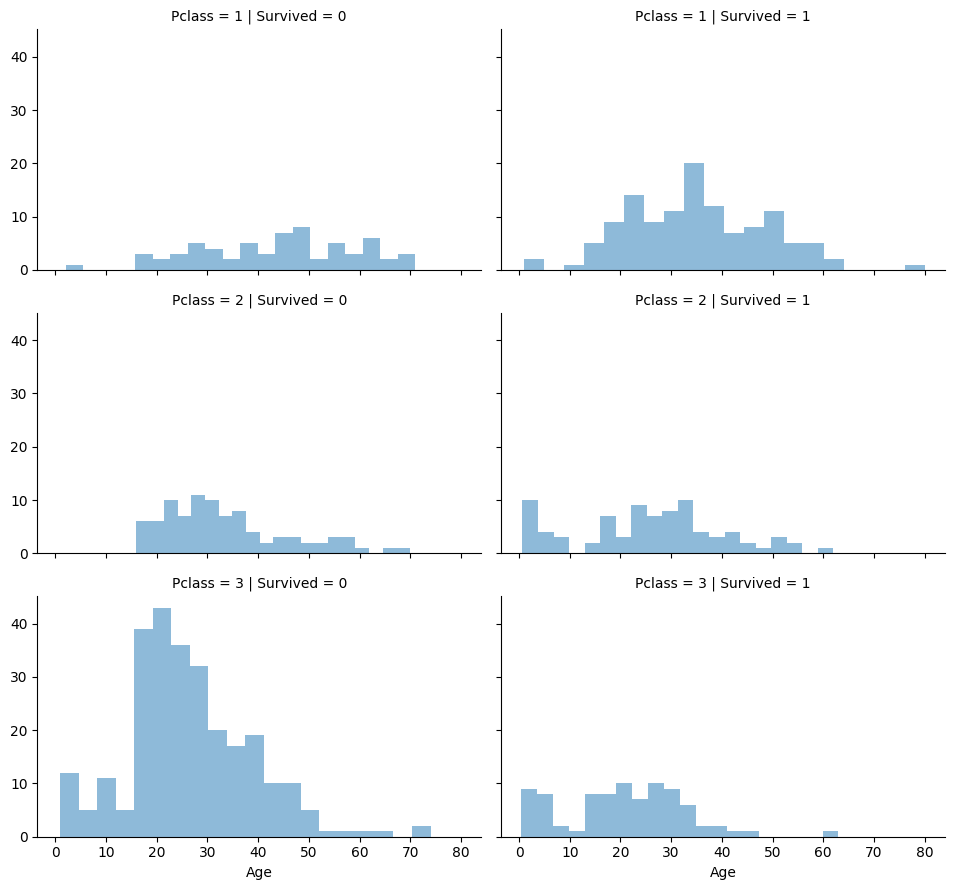

In [16]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

We notice also that if a person is in pclass 3 ,he will not survive.

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


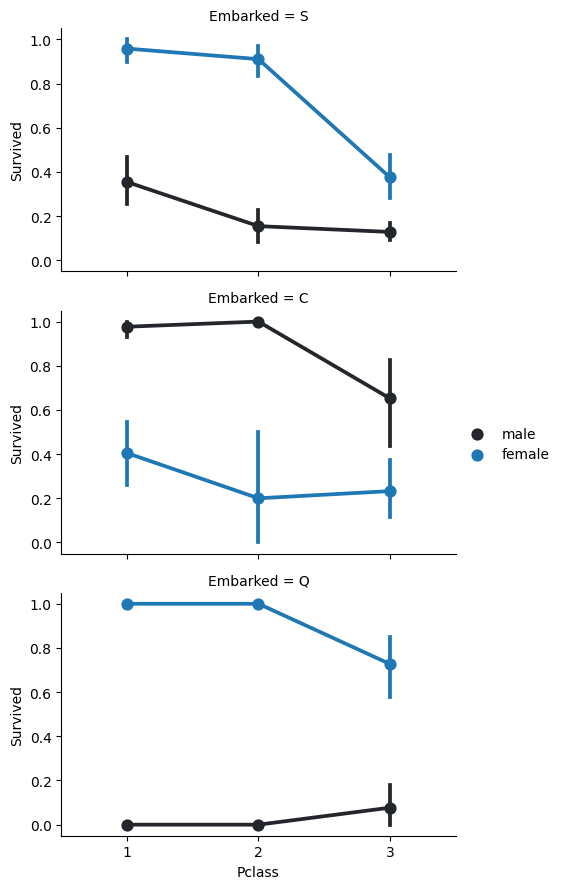

In [17]:
#Embarked, Pclass and Sex
FacetGrid = sns.FacetGrid(train_data, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FacetGrid.add_legend()

Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
Women have a high survival probability if they are on port Q and on port S, but a low probability if they are on port C.


## Data Preprocessing

First of all, we gonna drop the unused columns like PassengerId and Ticket, from the train set, because it does not contribute to a persons survival probability. but for test set we will not drop the PassengerId column,since it is required there for the submission.Then we gonna drop the Cabin feature from the train and test data because it has 77.1% missing values in train data and 78.2% in test data 

In [18]:
#drop unused columns from training data
train_data.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
#drop unused columns from test data
test_data.drop(['Ticket','Cabin'],axis=1,inplace=True)

As a reminder, we have to deal with the messing data,but we must fist split our data into numerical and categorical features.So,

In [19]:

num_columns_selector = selector(dtype_exclude=object)
cat_columns_selector = selector(dtype_include=object)

#train
num_col_train=num_columns_selector(train_data)
cat_col_train=cat_columns_selector(train_data)

#test
num_col_test=num_columns_selector(test_data)
cat_col_test=cat_columns_selector(test_data)

- #### Starting with numerical features:

In [20]:
#train
null_val_numeric = pd.DataFrame(train_data[num_col_train].isnull().sum().sort_values(ascending=False))
null_val_numeric.columns = ['Count null train_numeric values']
null_val_numeric.index.name = 'Train_numeric features'
null_val_numeric.style.background_gradient('viridis')

,Count null train_numeric values
Train_numeric features,
Age,177
Survived,0
Pclass,0
SibSp,0
Parch,0
Fare,0


As we see here,there are 177 missing values for age column.let's deal with it by replacing those missing values

In [21]:
display(pd.DataFrame(train_data[['Age']].describe().T))
print('--------------------------------------------------------')
print('Mode:\n',train_data['Age'].mode())

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


--------------------------------------------------------
Mode:
 0    24.0
Name: Age, dtype: float64


In [22]:
#replacing missing values by using median of age
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
#check
sum(train_data[num_col_train].isnull().sum())

0

In [23]:
#test
null_val_numeric = pd.DataFrame(test_data[num_col_test].isnull().sum().sort_values(ascending=False))
null_val_numeric.columns = ['Count null test_numeric values']
null_val_numeric.index.name = 'Test_numeric features'
null_val_numeric.style.background_gradient('viridis')

,Count null test_numeric values
Test_numeric features,
Age,86
Fare,1
PassengerId,0
Pclass,0
SibSp,0
Parch,0


From the above result,we notice that the following columns Age and Fare have null values which are respectively 86,1 and 8. So we we must handle them

In [24]:
print('----------------------------Age-------------------------------------')
display(pd.DataFrame(test_data[['Age']].describe().T))
print('Mode:\n',test_data['Age'].mode())

print('----------------------------Fare--------------------------------------')
display(pd.DataFrame(test_data[['Fare']].describe().T))
print('Mode:\n',test_data['Fare'].mode())

----------------------------Age-------------------------------------


,count,mean,std,min,25%,50%,75%,max
Age,332.0,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0


Mode:
 0    21.0
1    24.0
Name: Age, dtype: float64
----------------------------Fare--------------------------------------


,count,mean,std,min,25%,50%,75%,max
Fare,417.0,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292


Mode:
 0    7.75
Name: Fare, dtype: float64


In [25]:
#replacing missing values by using median 
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())
#check
sum(test_data[num_col_test].isnull().sum())

0

- #### let's deal with categorical columns:

In [26]:
#train
null_val_categ = pd.DataFrame(train_data[cat_col_train].isnull().sum().sort_values(ascending=False)[:30])
null_val_categ.columns = ['Count null train_categorical values']
null_val_categ.index.name = 'Train_categorical features'
null_val_categ.style.background_gradient('viridis')

,Count null train_categorical values
Train_categorical features,
Embarked,2
Name,0
Sex,0


As we see here, the following column Embarked has null values which is 2.let's trait those 2 missing values

In [27]:
#replacing missing values by using the mode(most frequent) 
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [28]:
#test
null_val_categ = pd.DataFrame(test_data[cat_col_test].isnull().sum().sort_values(ascending=False)[:30])
null_val_categ.columns = ['Count null test_categorical values']
null_val_categ.index.name = 'Test_categorical features'
null_val_categ.style.background_gradient('viridis')

,Count null test_categorical values
Test_categorical features,
Name,0
Sex,0
Embarked,0


We notice that there are not missing values.

In [29]:
data=[train_data,test_data]
for d in data:
    d['family'] = d['SibSp'] + d['Parch']
    d.loc[d['family'] > 0, 'not_alone'] = 0
    d.loc[d['family'] == 0, 'not_alone'] = 1
    
print(train_data['not_alone'].value_counts())
print(test_data['not_alone'].value_counts())

train_data.drop(['SibSp','Parch'],axis=1,inplace=True)
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

1.0    537
0.0    354
Name: not_alone, dtype: int64
1.0    253
0.0    165
Name: not_alone, dtype: int64


<AxesSubplot: xlabel='family', ylabel='Survived'>

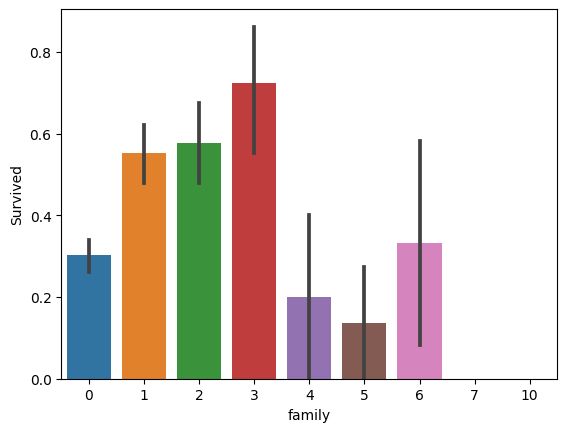

In [30]:
sns.barplot(x='family',y='Survived',data=train_data)

Here we note a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3.

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [31]:
data=[train_data,test_data]
for d in data:
    # extract titles
    d['Title'] = d['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    d['Title'] = d['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    d['Title'] = d['Title'].replace(['Mlle','Ms'], 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')
    
#drop name column    
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

Text(0.5, 25.581597222222214, 'test data')

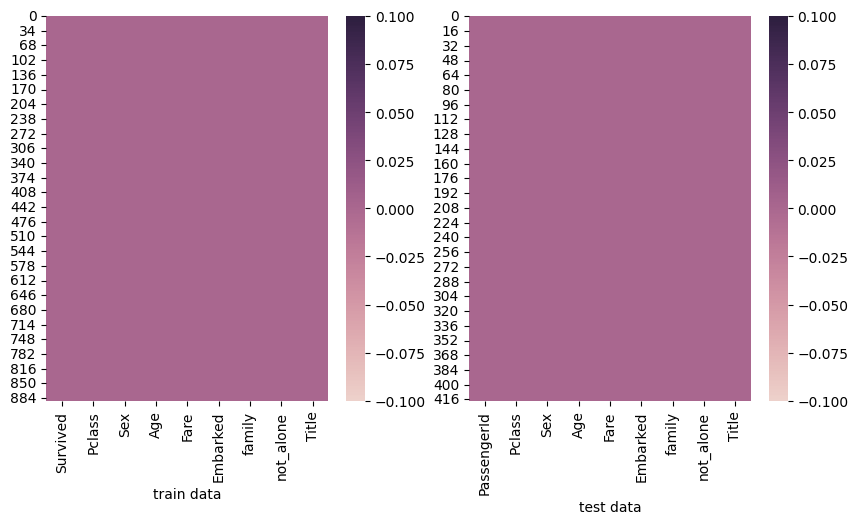

In [32]:
#Check all
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(train_data.isnull(),ax=ax[0],cmap=sns.cubehelix_palette(as_cmap=True))
ax[0].set_xlabel('train data')
sns.heatmap(test_data.isnull(), ax=ax[1],cmap=sns.cubehelix_palette(as_cmap=True))
ax[1].set_xlabel('test data')


All missing values were handled successfully

## Encoding categorical data

In [33]:
#train
num_col_train=num_columns_selector(train_data)
cat_col_train=cat_columns_selector(train_data)

#test
num_col_test=num_columns_selector(test_data)
cat_col_test=cat_columns_selector(test_data)

In [34]:
cat_col_train,cat_col_test

(['Sex', 'Embarked', 'Title'], ['Sex', 'Embarked', 'Title'])

So we must convert those columns Sex,Embarked and Title:

In [35]:

data=[train_data,test_data]

#Sex
mapping_dict= {"male": 0,
                 "female": 1}


for i in data:
    i['Sex'] = i['Sex'].map(mapping_dict)
    
    
#Embarked
mapping_dict = {
           "S": 0, 
           "C": 1, 
           "Q": 2}

for i in data:
    i['Embarked'] = i['Embarked'].map(mapping_dict)
    
#Name
mapping_dict={
            "Mr": 0, 
            "Miss": 1,
            "Mrs": 2, 
            "Master": 3,
            "Rare": 4}
for i in data:
    i['Title'] = i['Title'].map(mapping_dict)
    


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    int64  
 6   family     891 non-null    int64  
 7   not_alone  891 non-null    float64
 8   Title      891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


We conclude that all our features are numerics

## Data Modeling

In [37]:
y = train_data['Survived']
x = train_data.drop(['Survived'], axis = 1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [39]:
#LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [40]:
#RandomForestClassifier

rf = RandomForestClassifier(n_estimators=90)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

## Model Evaluation

Let's now evaluate our models

In [41]:
#LogisticRegression

print('accuracy:',metrics.accuracy_score(y_test,y_pred_lr))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
metrics.confusion_matrix(y_test, y_pred_lr)

accuracy: 0.7985074626865671
Mean Absolute Error: 0.20149253731343283
Mean Squared Error: 0.20149253731343283
Root Mean Squared Error: 0.4488792012484348


array([[131,  26],
       [ 28,  83]], dtype=int64)

In [42]:
#RandomForestClassifier

print('accuracy:',metrics.accuracy_score(y_test,y_pred_rf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
metrics.confusion_matrix(y_test, y_pred_rf)

accuracy: 0.8097014925373134
Mean Absolute Error: 0.19029850746268656
Mean Squared Error: 0.19029850746268656
Root Mean Squared Error: 0.436232171512701


array([[136,  21],
       [ 30,  81]], dtype=int64)

We can observe that RandomForestClassifier and LogisticRegression are closed, but:
   
  -  RandomForestClassifier has the best value of MAE: 
  -  RandomForestClassifier has the best value of accuracy,
  -  RandomForestClassifier has the best value of MSE,
  -  RandomForestClassifier has the best value of RMSE,
 
Based on model evaluatuin, we  consider the *RandomForestClassifier* model as the most efficient model.So,we gonna use the RandomForestClassifier model to predict the new data : test_data

In [43]:
# ==== final test prediction ====
X_test = test_data.drop('PassengerId',axis=1)

predictions = rf.predict(X_test)
outputs = pd.DataFrame({'PassengerId': test_data.loc[:, 'PassengerId'], 'Survived': predictions})
outputs.to_csv('s-s.csv', index=False)
print('Done!')

Done!
